# This is a preliminary analysis of the given data



In [34]:
# managing imports
#data manipulation
import numpy as np 
import pandas as pd 

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#advance visualisation
import missingno as msno # visualize missing data

# statistics
from scipy import stats

# configure matplotlib to display plots inline
%matplotlib inline

#setting seaborn style to for aesthetics
sns.set_theme(style="whitegrid")


In [35]:
## loading data
file_path='./dataset/train.csv'
train_data=pd.read_csv(file_path)

## 1. Data overview

1. shape of dataset
2. data types
3. sample rows

In [36]:
#shape of data
print("Shape of train dataset : \n{}\n".format(train_data.shape))

Shape of train dataset : 
(58645, 13)



In [37]:
#data type of each column
print("Column Name : Data types \n{}\n".format(train_data.dtypes))

Column Name : Data types 
id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object



In [38]:
#sample rows
print(train_data.head())

   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0              

In [39]:
# check for duplicates
duplicate = train_data.duplicated().sum
print("Number of duplicate rows : ",duplicate)

#Memory usage
memory_usage_bytes=train_data.memory_usage(deep=True).sum()
print("\nMemory usage in (in bytes) : ",memory_usage_bytes)

Number of duplicate rows :  <bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
58640    False
58641    False
58642    False
58643    False
58644    False
Length: 58645, dtype: bool>

Memory usage in (in bytes) :  18628388


In [40]:
#basic info of the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

## 2. Missing values

1. count missing values :  identitfy columns with missing data and total number of such records.
2. visualizing missing values

In [43]:
# count missing value for each column
missing_values =train_data.isnull().sum()
print("Missing values per column : \n",missing_values)

#percentage of missing values

missing_percentage = (missing_values/train_data.shape[0])*100

print("\nPercentage of missing values per column : ",missing_percentage)

Missing values per column : 
 id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Percentage of missing values per column :  id                            0.0
person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
loan_status                   0.0
dtype: float64


c:\Users\swapn\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\swapn\anaconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


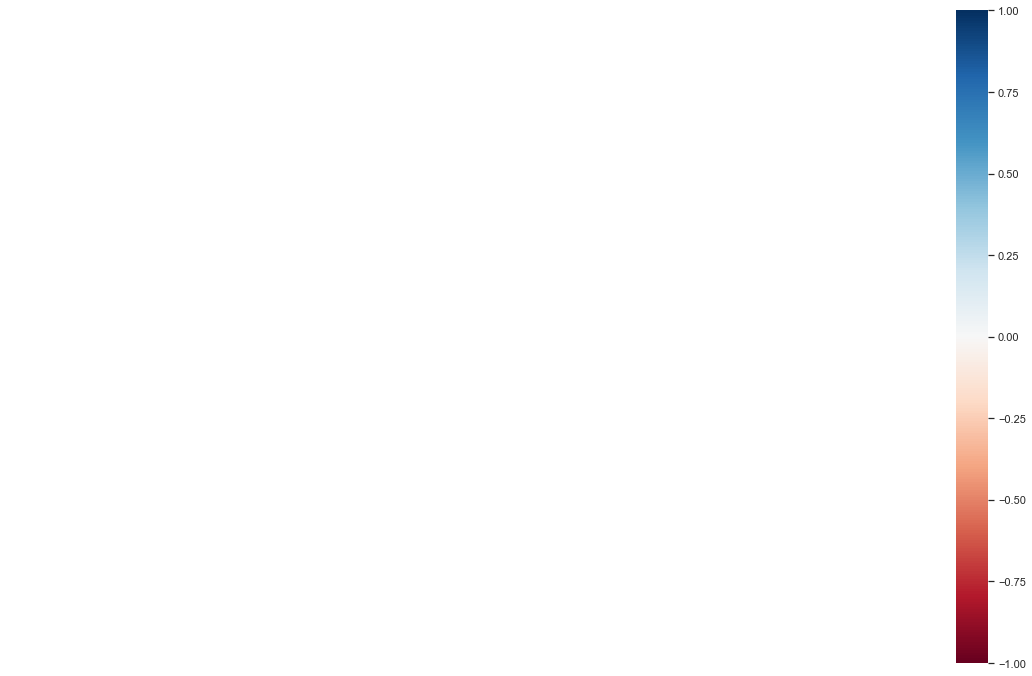

In [47]:
# visualize the missing values of a heatmap
msno.heatmap(train_data)
plt.show()

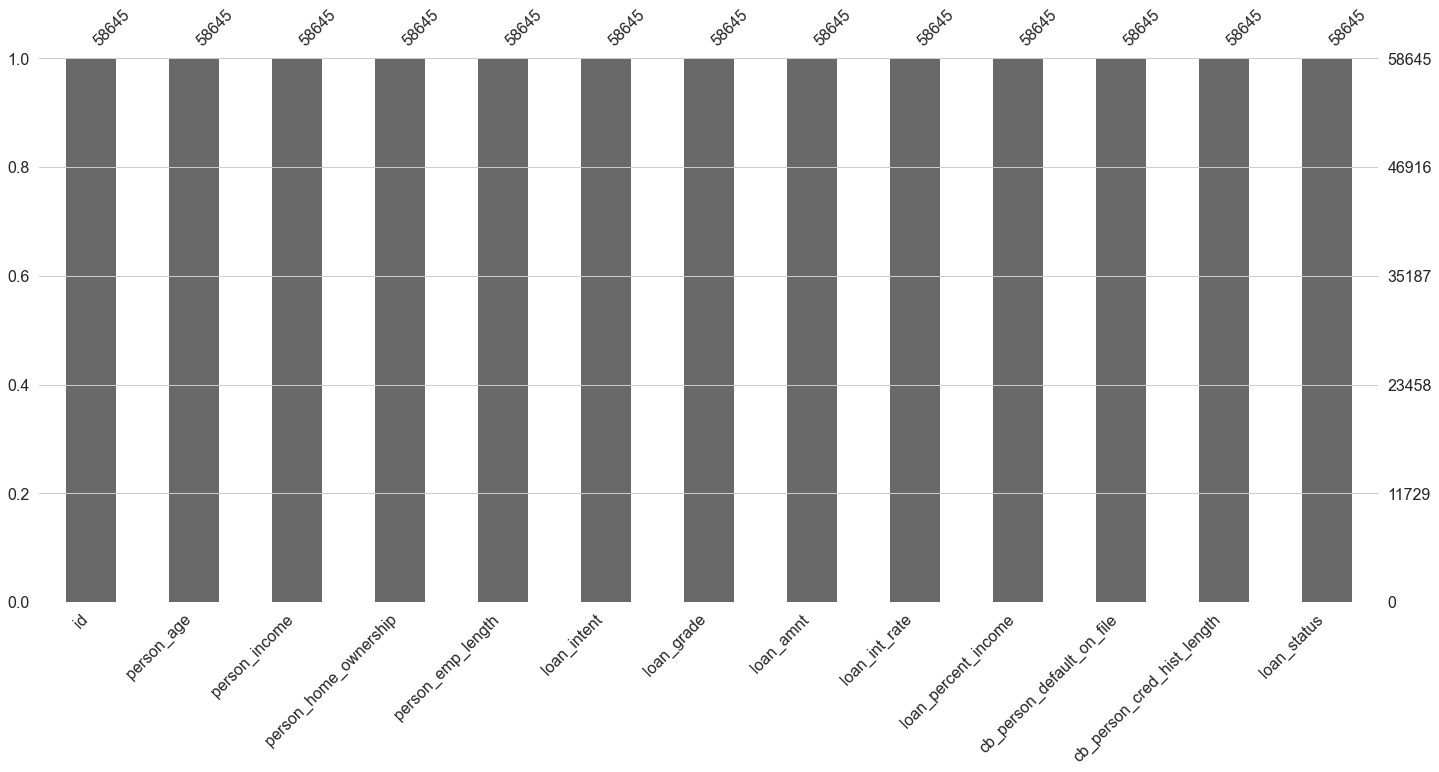

In [48]:
# visualize bar plot
msno.bar(train_data)
plt.show()

In [46]:
#check the number of missing rows with any missing values
row_with_missing=train_data[train_data.isnull().any(axis=1)]

print("Number of rows with any missing values : ",len(row_with_missing))

Number of rows with any missing values :  0


## 3. Descriptive statistics 
1. Summary statistics
2. skewness | kurtosis : distribution of numerical features

In [49]:
#pandas default statistics for numerical features
numerical_summary=train_data.describe()
print("Summary statistics of the training data set : \n",numerical_summary)

Summary statistics of the training data set : 
                  id    person_age  person_income  person_emp_length  \
count  58645.000000  58645.000000   5.864500e+04       58645.000000   
mean   29322.000000     27.550857   6.404617e+04           4.701015   
std    16929.497605      6.033216   3.793111e+04           3.959784   
min        0.000000     20.000000   4.200000e+03           0.000000   
25%    14661.000000     23.000000   4.200000e+04           2.000000   
50%    29322.000000     26.000000   5.800000e+04           4.000000   
75%    43983.000000     30.000000   7.560000e+04           7.000000   
max    58644.000000    123.000000   1.900000e+06         123.000000   

          loan_amnt  loan_int_rate  loan_percent_income  \
count  58645.000000   58645.000000         58645.000000   
mean    9217.556518      10.677874             0.159238   
std     5563.807384       3.034697             0.091692   
min      500.000000       5.420000             0.000000   
25%     5000.0000

In [50]:
#summary for categorical statistics
categorical_summary={}
for col in train_data.select_dtypes(include=['object','category']).columns:
    categorical_summary[col]=train_data[col].value_counts

#print the categorical summary

for col,counts in categorical_summary.items():
    print(f"Value counts for {col} : \n{counts}\n")

Value counts for person_home_ownership : 
<bound method IndexOpsMixin.value_counts of 0            RENT
1             OWN
2             OWN
3            RENT
4            RENT
           ...   
58640    MORTGAGE
58641        RENT
58642        RENT
58643        RENT
58644    MORTGAGE
Name: person_home_ownership, Length: 58645, dtype: object>

Value counts for loan_intent : 
<bound method IndexOpsMixin.value_counts of 0        EDUCATION
1          MEDICAL
2         PERSONAL
3          VENTURE
4          MEDICAL
           ...    
58640    EDUCATION
58641      MEDICAL
58642    EDUCATION
58643    EDUCATION
58644      VENTURE
Name: loan_intent, Length: 58645, dtype: object>

Value counts for loan_grade : 
<bound method IndexOpsMixin.value_counts of 0        B
1        C
2        A
3        B
4        A
        ..
58640    D
58641    C
58642    D
58643    A
58644    B
Name: loan_grade, Length: 58645, dtype: object>

Value counts for cb_person_default_on_file : 
<bound method IndexOpsMixin.va

In [51]:
#checking for skewness and distribution to understand the distribution of data

skewness = train_data.skew()

kurtosis = train_data.kurtosis()

print("Skewness : \n",skewness)
print("\nKurtosis : \n",kurtosis)

Skewness : 
 id                             0.000000
person_age                     1.965497
person_income                 10.457723
person_emp_length              2.054430
loan_amnt                      1.188578
loan_int_rate                  0.200020
loan_percent_income            0.917473
cb_person_cred_hist_length     1.618503
loan_status                    2.046848
dtype: float64

Kurtosis : 
 id                             -1.200000
person_age                      6.408380
person_income                 342.629353
person_emp_length              29.131606
loan_amnt                       1.693784
loan_int_rate                  -0.718153
loan_percent_income             0.631343
cb_person_cred_hist_length      3.490775
loan_status                     2.189663
dtype: float64


C:\Users\swapn\AppData\Local\Temp/ipykernel_21980/2706662840.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = train_data.skew()
C:\Users\swapn\AppData\Local\Temp/ipykernel_21980/2706662840.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurtosis = train_data.kurtosis()


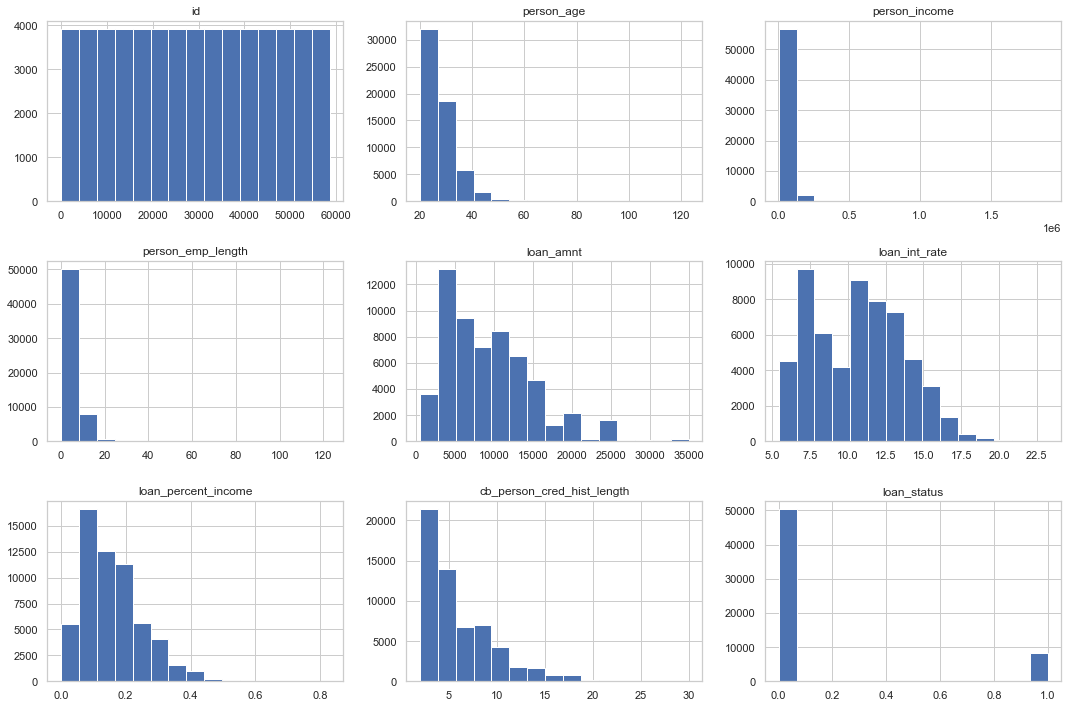

In [52]:
#visualizing distribution of numerical features

#ploting histograms for numerical features
train_data.hist(bins=15,figsize=(15,10),layout=(3,3))
plt.tight_layout()
plt.show()

c:\Users\swapn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\swapn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\swapn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\swapn\anaconda3\lib\si

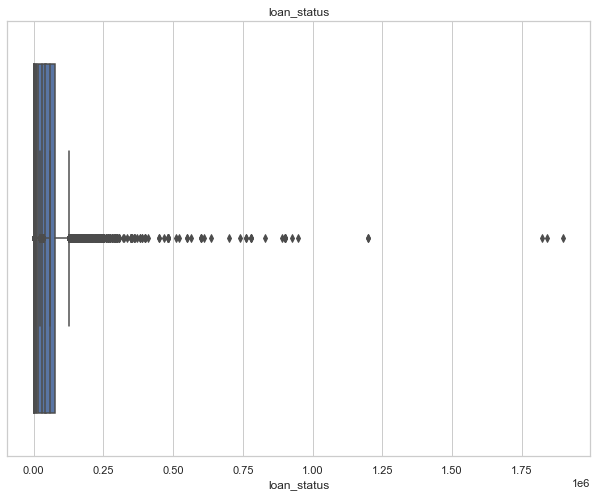

In [54]:
#box plots for numerical features

plt.figure(figsize=(25,20))
for i,col in enumerate(train_data.select_dtypes(include=[np.number]).columns,1):
    plt.subplot(3,3,1)
    sns.boxplot(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## 4. Data distribution

1. Histograms
2. Box plots

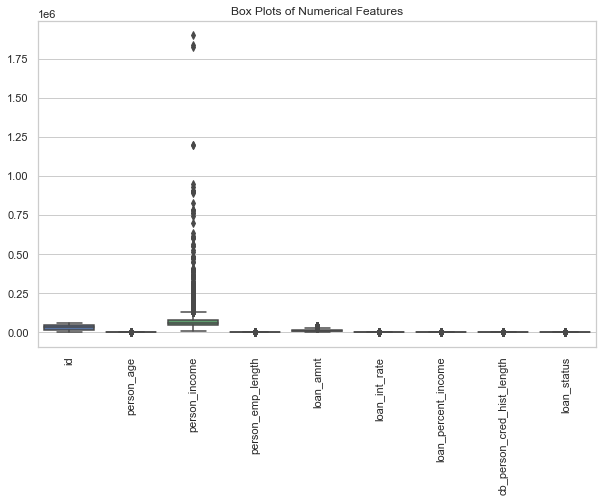

In [55]:
# Box plots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Box Plots of Numerical Features")
plt.show()

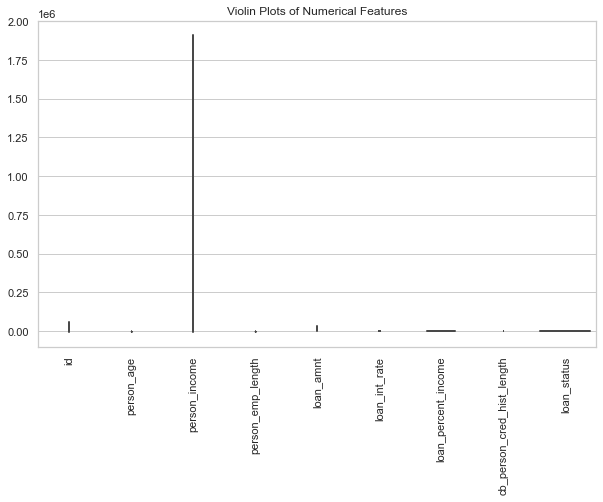

In [56]:
# Violin plots for numerical features
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data.select_dtypes(include=[np.number]), inner="quartile")
plt.xticks(rotation=90)
plt.title("Violin Plots of Numerical Features")
plt.show()


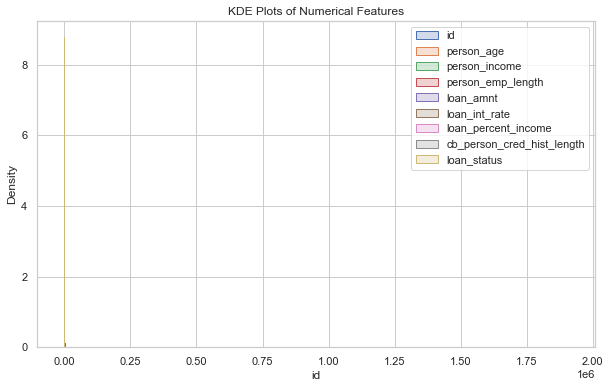

In [65]:
# KDE plots for numerical features
plt.figure(figsize=(10, 6))
for col in train_data.select_dtypes(include=[np.number]).columns:
    sns.kdeplot(train_data[col], label=col, fill=True)
plt.title("KDE Plots of Numerical Features")
plt.legend()
plt.show()


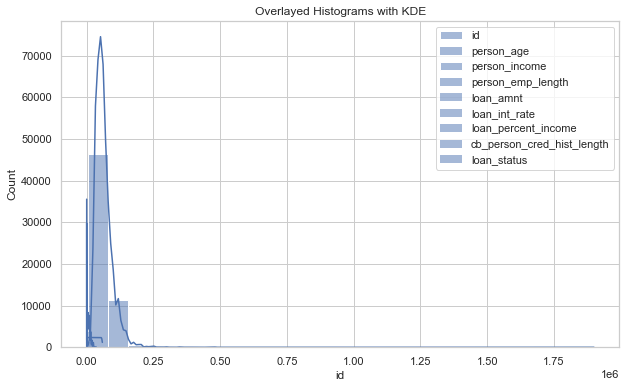

In [67]:
# Overlay histograms for comparison
plt.figure(figsize=(10, 6))
for col in train_data.select_dtypes(include=[np.number]).columns:
    sns.histplot(train_data[col], bins=15, kde=True, label=col, alpha=0.5)
plt.title("Overlayed Histograms with KDE")
plt.legend()
plt.show()


## 5. Correlation analysis

1. correlation matrix
2. pair plots

In [68]:
# Compute the correlation matrix
correlation_matrix = train_data.corr()
print("Correlation matrix:\n", correlation_matrix)


Correlation matrix:
                                   id  person_age  person_income  \
id                          1.000000    0.008608      -0.001896   
person_age                  0.008608    1.000000       0.102176   
person_income              -0.001896    0.102176       1.000000   
person_emp_length           0.005376    0.121276       0.164042   
loan_amnt                  -0.000403    0.050378       0.310942   
loan_int_rate              -0.003454    0.009653      -0.057611   
loan_percent_income        -0.002677   -0.031975      -0.280314   
cb_person_cred_hist_length  0.008139    0.874260       0.082727   
loan_status                -0.008138   -0.001130      -0.169956   

                            person_emp_length  loan_amnt  loan_int_rate  \
id                                   0.005376  -0.000403      -0.003454   
person_age                           0.121276   0.050378       0.009653   
person_income                        0.164042   0.310942      -0.057611   
person_e

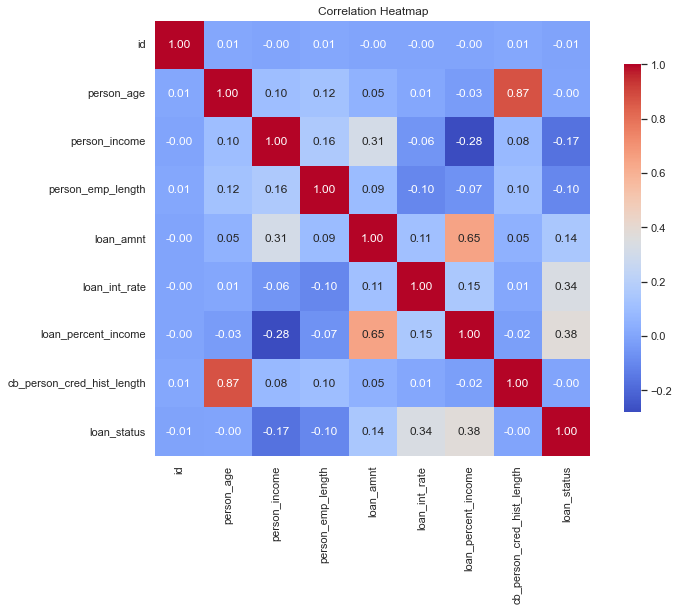

In [69]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()


In [72]:
# Correlation with target variable (replace 'target_variable' with your actual target)
target_correlation = correlation_matrix['loan_status'].sort_values(ascending=False)
print("Correlation with target variable:\n", target_correlation)


Correlation with target variable:
 loan_status                   1.000000
loan_percent_income           0.378280
loan_int_rate                 0.338948
loan_amnt                     0.144982
person_age                   -0.001130
cb_person_cred_hist_length   -0.003030
id                           -0.008138
person_emp_length            -0.100428
person_income                -0.169956
Name: loan_status, dtype: float64


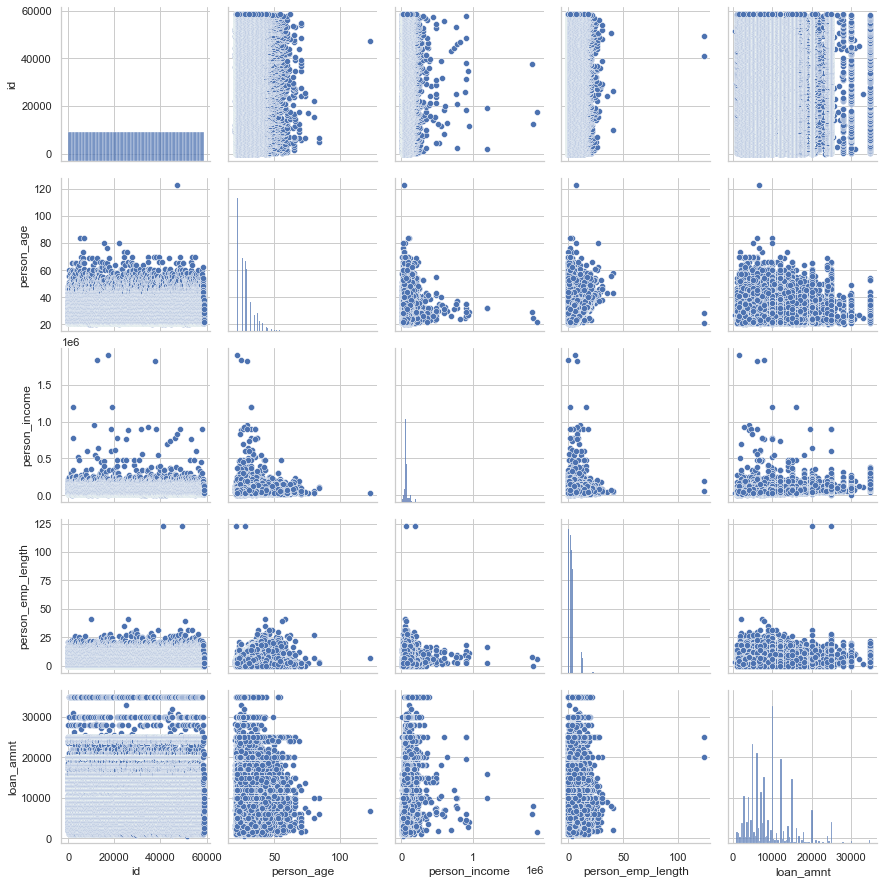

In [74]:
# Pair plots for a subset of features
sns.pairplot(train_data, vars=train_data.select_dtypes(include=[np.number]).columns[:5])  # Adjust the columns as needed
plt.show()


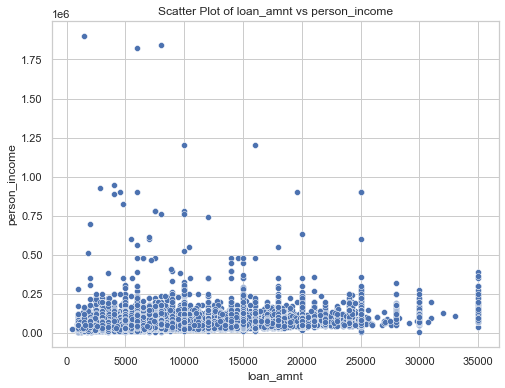

In [76]:
# Scatter plot for two strongly correlated features (replace with your feature names)
feature1="loan_amnt"
feature2="person_income"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x=feature1, y=feature2)
plt.title(f"Scatter Plot of {feature1} vs {feature2}")
plt.show()


## 6. Categorical data analysis

1. bar plots
2. count plots

## 7. Feature relationships

1. scatter plots
2. box plots by category

## 8. Target variable analysis

1. distribution of target variable
2. class balance

## 9. Feature engineering insights

1. feature importance
2. interaction terms

## 10. Advance visualization
1. violin plots : combine box plots and density plots to visualize distribution and outliers
2. facet grids : explore relation across multiple categories 

## 11 . Metrics to consider

1. Descriptive statistics : Mean, Mode, Median, variance and standard deviation
2. Correlations: pearson or spearman correlation coefficients
3. Missing value percentage : percentage of missing value in each
4. Outliers : number of outliers detected